01-Decisões baseadas em Dados

**02-Análise de Dados e Pandas**

03-Visualização de Dados

04-Data Storytelling

05-Introdução ao Machine Learning

06-Técnicas Avançadas de Machine Learning

07-Auto Machine Learning

08-Machine Learning na Nuvem

09-Criando um Projeto do Zero

10-Deploy de Aplicação Machine Learning

11-Deep Learning


In [ ]:
# https://towardsdatascience.com/google-drive-google-colab-github-dont-just-read-do-it-5554d5824228

# Mount Google Drive
from google.colab import drive # import drive from google colab

ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)

drive.mount(ROOT)           # we mount the google drive at /content/drive

/content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%pwd

'/content/drive/MyDrive'

In [ ]:
%cd ..
%cd ..
%cd ..
%cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive
/content/drive
/content
/content/drive/MyDrive/Colab Notebooks


In [ ]:
# Python Exploratory Data Analysis (EDA) on NYC Airbnb
# https://medium.com/analytics-vidhya/python-exploratory-data-analysis-eda-on-nyc-airbnb-cbeabd622e30
# https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data

# Inicializar bibliotecas

In [ ]:
# Importar pacotes necessários -> pandas, matplotlib, seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Carregar dados brutos

In [ ]:
# Inicializar dados brutos
# Importar o arquivos listings.csv para um Dataframe

df = pd.read_csv("https://www.dropbox.com/s/33gfbmmc09b2olm/listings.csv?dl=1")

In [ ]:
# http://insideairbnb.com/get-the-data/
# Quarterly data for the last year for each region is avaiable for free download on this page,
# or if you are interested in monthly or archived data, you could make an archived data request.
###################################
# listings.csv

# id
# name
# host_id
# host_name
# neighbourhood_group
# neighbourhood
# latitude
# longitude
# room_type
# price
# minimum_nights
# number_of_reviews
# last_review
# reviews_per_month
# calculated_host_listings_count
# availability_365
# number_of_reviews_ltm
# license
###################################
# calendar.csv.gz

# listing_id
# date,available
# price
# adjusted_price
# minimum_nights
# maximum_nights

###################################
# reviews.csv

# listing_id
# date

# reviews.gz
# listing_id
# id,date
# reviewer_id
# reviewer_name
# comments

###################################
# neighbourhoods.csv

# neighbourhood_group
# neighbourhood

###################################
# neighbourhoods.geojson
###################################

In [ ]:
# Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?

# Verificar primeiras características dos dados brutos a serem analisados
# Mostrar as 5 primeiras entradas, método head()

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96599,-43.17940,Entire home/apt,190,5,260,2021-02-08,1.98,1,343
1,24480,Nice and cozy near Ipanema Beach,99249,Goya,NaN,Ipanema,-22.98405,-43.20189,Entire home/apt,311,3,85,2018-02-14,0.66,1,73
2,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98839,-43.19232,Entire home/apt,267,2,181,2020-03-15,1.98,1,272
3,35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,153691,Patricia Miranda & Paulo,NaN,Copacabana,-22.98107,-43.19136,Entire home/apt,120,3,359,2021-04-21,2.79,1,139
4,41198,"Modern 2bed,Top end of Copacabana",178975,Nicky,NaN,Copacabana,-22.98102,-43.19172,Entire home/apt,493,3,18,2016-02-09,0.18,2,365


In [ ]:
# Descrever o dicionário das variáveis do dataset; método columns

df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
# Caracterizar dataset: métodos describe(), info(), shape()...

In [ ]:
df.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.646700e+04,2.646700e+04,0.0,26467.000000,26467.000000,26467.000000,26467.00000,26467.000000,16643.000000,26467.000000,26467.000000
mean,2.534654e+07,1.005248e+08,NaN,-22.965703,-43.249105,734.860052,4.80096,12.417501,0.580291,6.919220,214.943099
std,1.583781e+07,1.086789e+08,NaN,0.035131,0.096835,5274.600381,19.21445,30.313117,0.823784,21.310525,143.136520
min,1.787800e+04,3.607000e+03,NaN,-23.072620,-43.701200,0.000000,1.00000,0.000000,0.010000,1.000000,0.000000
25%,1.220318e+07,1.431500e+07,NaN,-22.984570,-43.305785,150.000000,1.00000,0.000000,0.080000,1.000000,88.000000
50%,2.382806e+07,6.033966e+07,NaN,-22.971580,-43.196330,260.000000,2.00000,2.000000,0.260000,1.000000,223.000000
75%,4.096720e+07,1.546859e+08,NaN,-22.950625,-43.186260,529.000000,4.00000,9.000000,0.770000,3.000000,364.000000
max,4.941930e+07,3.981827e+08,NaN,-22.749690,-43.104400,623592.000000,1000.00000,452.000000,26.430000,199.000000,365.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26467 entries, 0 to 26466
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              26467 non-null  int64  
 1   name                            26438 non-null  object 
 2   host_id                         26467 non-null  int64  
 3   host_name                       25610 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   26467 non-null  object 
 6   latitude                        26467 non-null  float64
 7   longitude                       26467 non-null  float64
 8   room_type                       26467 non-null  object 
 9   price                           26467 non-null  int64  
 10  minimum_nights                  26467 non-null  int64  
 11  number_of_reviews               26467 non-null  int64  
 12  last_review                     

In [ ]:
# Verificar 'forma', quantidade de linhas e colunas -> método shape
df.shape

(26467, 16)

In [ ]:
# Caracterizar tamanho do dataset
# Identificar o volume de dados do DataFrame -> describe, length..etc(?)

print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# Verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 26467
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [ ]:
# df.isnull() -> retorna df com 'true' ou 'false' em cada célula
# se for incluído o método .sum(), é obtida a soma de nulos a cada coluna
df.isnull().sum()

id                                    0
name                                 29
host_id                               0
host_name                           857
neighbourhood_group               26467
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        9824
reviews_per_month                  9824
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
# Q2. Qual a porcentagem de valores ausentes no dataset?

(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

# Caracterizar possíveis inconsistências no dataset
# Identificar a porcentagem de valores ausentes do dataset -> df.isnull(), df.shape..sort_values(...)

neighbourhood_group               1.000000
last_review                       0.371179
reviews_per_month                 0.371179
host_name                         0.032380
name                              0.001096
id                                0.000000
host_id                           0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

In [ ]:
# Caracterizar quais variáveis possuem mais possíveis inconsistências
# Ordenar em ordem decrescente as variáveis por seus valores ausentes -> df.sort_values(by=['col1'])

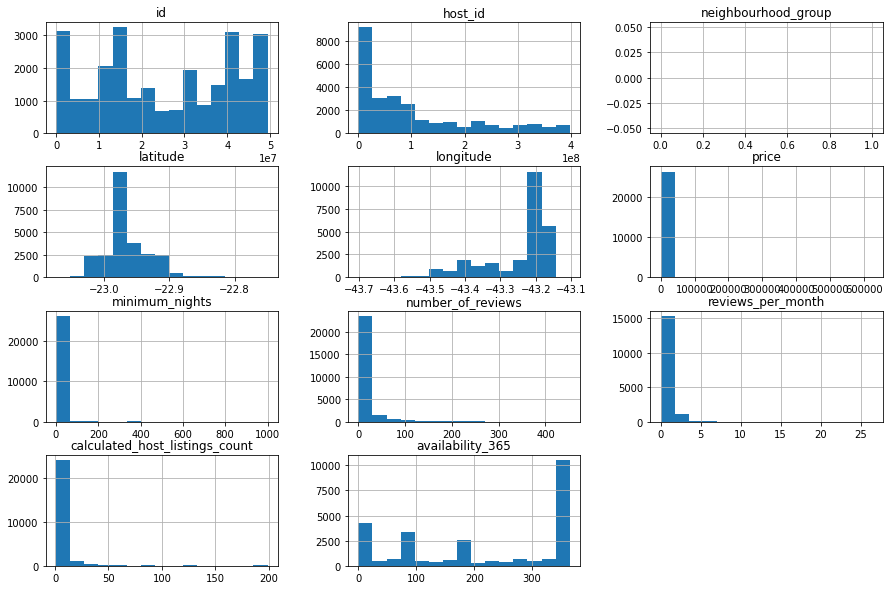

In [ ]:
# Q3. Qual o tipo de distribuição das variáveis?

# Verificar distribuição das variáveis do dataset bruto
# Plotar histograma das variáveis numéricas -> df.hist(bins... figsize...)

df.hist(bins=15, figsize=(15,10));

In [ ]:
# Verificar a média dos preços
# Plotar boxplot para 'price'

In [ ]:
# Q4. Há outliers presentes?

# verificar outliers -> realizar limpeza, plotar histogramas novamente

df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

# Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

# A variável price possui ....% do valor abaixo de ....., porém seu valor máximo é .......
# A quantidade mínima de noites (minimum_nights) está acima de .... dias no ano.

# Boxplot para minimum_nights:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

# Boxplot para price

# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));
# -------
# Histogramas sem outliers
# Já que identificamos outliers nas variáveis price e minimum_nights, vamos agora limpar o DataFrame delas e plotar novamente o histograma.

# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

In [ ]:
# Q4. Qual a correlação existente entre as variáveis

# verificar correlação existente entre variáveis
# correlação vs causalidade -> https://www.tylervigen.com/spurious-correlations
# https://escoladedados.org/tutoriais/correlacao-nao-e-causalidade-mas-o-que-e-entao/

# Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

# Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela.
# Para identificar as correlações existentes entre as variáveis de interesse, vou:

# Criar uma matriz de correlação
# Gerar um heatmap a partir dessa matriz, usando a biblioteca seaborn

# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

In [ ]:
# Q5. Qual o tipo de imóvel mais alugado no Airbnb?

# A coluna da variável room_type indica o tipo de locação que está anunciada no Airbnb.
# Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.
# Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método value_counts().

# verificar maiores frequências -> qual o tipo de imóvel mais alugado no airbnb
# verificar quantidade de cada tipo de imóvel disponível
# verificar porcentagem de cada tipo de imóvel disponível


# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

In [ ]:
# Q6. Qual a localidade mais cara do/da cidade tal?

# Uma maneira de se verificar uma variável em função da outra é usando groupby().
# No caso, queremos comparar os bairros (neighbourhoods) a partir do preço de locação.

df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

# verificar localidade (bairro?) mais cara da cidade -> df.groupby(...).price.mean().sort_values()
# plotar os imóveis pela latitude-longitude

df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

In [ ]:
# verificar média do mínimo de noites para aluguel, 'minimum_nights'

In [ ]:
# verificar frequência de termos -> wordcloud
# https://www.kaggle.com/code/chirag9073/airbnb-analysis-visualization-and-prediction

In [ ]:
# Conclusões

# https://towardsdatascience.com/how-to-sketch-your-data-science-ideas-with-excalidraw-a993d049f55c

# Conclusões -> DSNP:
# Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem outliers em algumas das variáveis.
# Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.
# Por fim, lembra-se que este dataset é uma versão resumida, ideal apenas para uma abordagem inicial.
# Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.